Import Nessasary Libraries

In [1]:
import pandas as pd
import numpy as np
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

Load The Dataset 

In [2]:
beeDataframe = pd.read_csv('Contact Information.csv')
# Dataset is now stored in a Pandas Dataframe

Dataset information

In [ ]:
beeDataframe.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Timestamp                                                                   100 non-null    object
 1   Farmer's Name                                                               100 non-null    object
 2   Which month has the highest yield?                                          100 non-null    object
 3   What is the location of your hives?                                         100 non-null    object
 4   How many hives do you have?                                                 100 non-null    object
 5   What kind of mostly used flowers or crops are your bees pollinating?        100 non-null    object
 6   How often do you harvest honey?                            

View the first 5 rows of the dataset


In [3]:
beeDataframe.head(5)

,Timestamp,Farmer's Name,Which month has the highest yield?,What is the location of your hives?,How many hives do you have?,What kind of mostly used flowers or crops are your bees pollinating?,How often do you harvest honey?,What is the average yield of honey per hive? (Pounds of honey per year),Have you noticed any unusual behaviour or symptoms in your bees recently?,Have you observed any dead bees around the hives?,How often do you inspect your hives for signs of disease or pests?,Have you noticed any changes in the size or activity of your bee colonies?,What temperature range is optimal for your bee colonies ? (Fahrenheit)
0,2023/03/04 6:02:31 PM GMT+5:30,Wimalasiri W.P,August,Uva Province,51-100,Vegetables,Once a Year,21-60,No,No,Every 2 Weeks,Yes,32-100
1,2023/03/04 6:03:40 PM GMT+5:30,Hansika,January,North Central Province,101-500,Sunflowers,Twice a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,32-100
2,2023/03/04 6:05:29 PM GMT+5:30,Mr.Silva,February,Western Province,101-500,Sunflowers,Twice a Year,61-100,No,No,Every 2 Weeks,No,101-150
3,2023/03/04 6:11:44 PM GMT+5:30,J.Somasiri,August,Uva Province,101-500,Fruit trees,Once a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,160 +
4,2023/03/04 6:13:15 PM GMT+5:30,J.Somasiri,January,Uva Province,101-500,Fruit trees,Once a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,160 +


# **Preprocess the dataset**

First of all we need to remove Columns That Contain a Single Value (Unique value columns).


In [4]:
# summarize the number of unique values in each column
print(beeDataframe.nunique())

Timestamp                                                                     305
Farmer's Name                                                                 299
Which month has the highest yield?                                             12
What is the location of your hives?                                             9
How many hives do you have?                                                     5
What kind of mostly used flowers or crops are your bees pollinating?            8
How often do you harvest honey?                                                 7
What is the average yield of honey per hive? (Pounds of honey per year)         4
Have you noticed any unusual behaviour or symptoms in your bees recently?       2
Have you observed any dead bees around the hives?                               2
How often do you inspect your hives for signs of disease or pests?              3
Have you noticed any changes in the size or activity of your bee colonies?      2
What temperature

We can remove the Timestamp and Farmer's name

In [5]:
beeDataframe = beeDataframe.drop(columns=['Timestamp','Farmer\'s Name'], axis=1)

In [ ]:
beeDataframe.head()

,Which month has the highest yield?,What is the location of your hives?,How many hives do you have?,What kind of mostly used flowers or crops are your bees pollinating?,How often do you harvest honey?,What is the average yield of honey per hive? (Pounds of honey per year),Have you noticed any unusual behaviour or symptoms in your bees recently?,Have you observed any dead bees around the hives?,How often do you inspect your hives for signs of disease or pests?,Have you noticed any changes in the size or activity of your bee colonies?,What temperature range is optimal for your bee colonies ? (Fahrenheit)
0,NaN,Uva Province,51-100,Vegetables,Once a Year,21-60,No,No,Every 2 Weeks,Yes,32-100
1,NaN,North Central Province,101-500,Sunflowers,Twice a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,32-100
2,NaN,Western Province,101-500,Sunflowers,Twice a Year,61-100,No,No,Every 2 Weeks,No,101-150
3,NaN,Uva Province,101-500,Fruit trees,Once a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,160 +
4,NaN,Uva Province,101-500,Fruit trees,Once a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,160 +


Creating much more simple feature names

In [6]:
beeDataframe = beeDataframe.rename(columns={
    'Which month has the highest yield?': 'Highest_Yeild_Month',
    'What is the location of your hives? ': 'Location',
    'How many hives do you have?': 'NumHives',
    'What kind of mostly used flowers or crops are your bees pollinating?': 'Flowers',
    'How often do you harvest honey?': 'HarvestFreq',
    'What is the average yield of honey per hive? (Pounds of honey per year)': 'AvgYield',
    'Have you noticed any unusual behaviour or symptoms in your bees recently?': 'Symptoms',
    'Have you observed any dead bees around the hives?': 'DeadBees',
    'How often do you inspect your hives for signs of disease or pests?': 'InspectFreq',
    'Have you noticed any changes in the size or activity of your bee colonies?': 'ColonyChanges',
    'What temperature range is optimal for your bee colonies ? (Fahrenheit)': 'TempRange'
})

In [ ]:
beeDataframe.head()

,Highest_Yeild_Month,Location,NumHives,Flowers,HarvestFreq,AvgYield,Symptoms,DeadBees,InspectFreq,ColonyChanges,TempRange
0,February,Uva Province,51-100,Vegetables,Once a Year,21-60,No,No,Every 2 Weeks,Yes,32-100
1,May,North Central Province,101-500,Sunflowers,Twice a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,32-100
2,April,Western Province,101-500,Sunflowers,Twice a Year,61-100,No,No,Every 2 Weeks,No,101-150
3,June,Uva Province,101-500,Fruit trees,Once a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,160 +
4,May,Uva Province,101-500,Fruit trees,Once a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,160 +


##**Check Null values**

In [ ]:
beeDataframe.isnull().values.any()

False

In [ ]:
# No null values

## **Handling Ouitliers - Box Plots**

Outliers are observations in a dataset that are unusually large or small and do not fit with the rest of the data. They can occur due to measurement errors, data entry errors, or natural variations in the data. Identifying and handling outliers is an important step in data preprocessing and analysis, as they can have a significant impact on the results of statistical analyses.

We can identify outliers using visualization techniques such as box plots and scatter plots to identify observations that fall outside the general pattern of the data.

In [ ]:
# As our dataframe only contains strings, we need to Create a new dataframe with value counts for each column
value_counts_df = pd.DataFrame({col: beeDataframe[col].value_counts() for col in beeDataframe.columns})

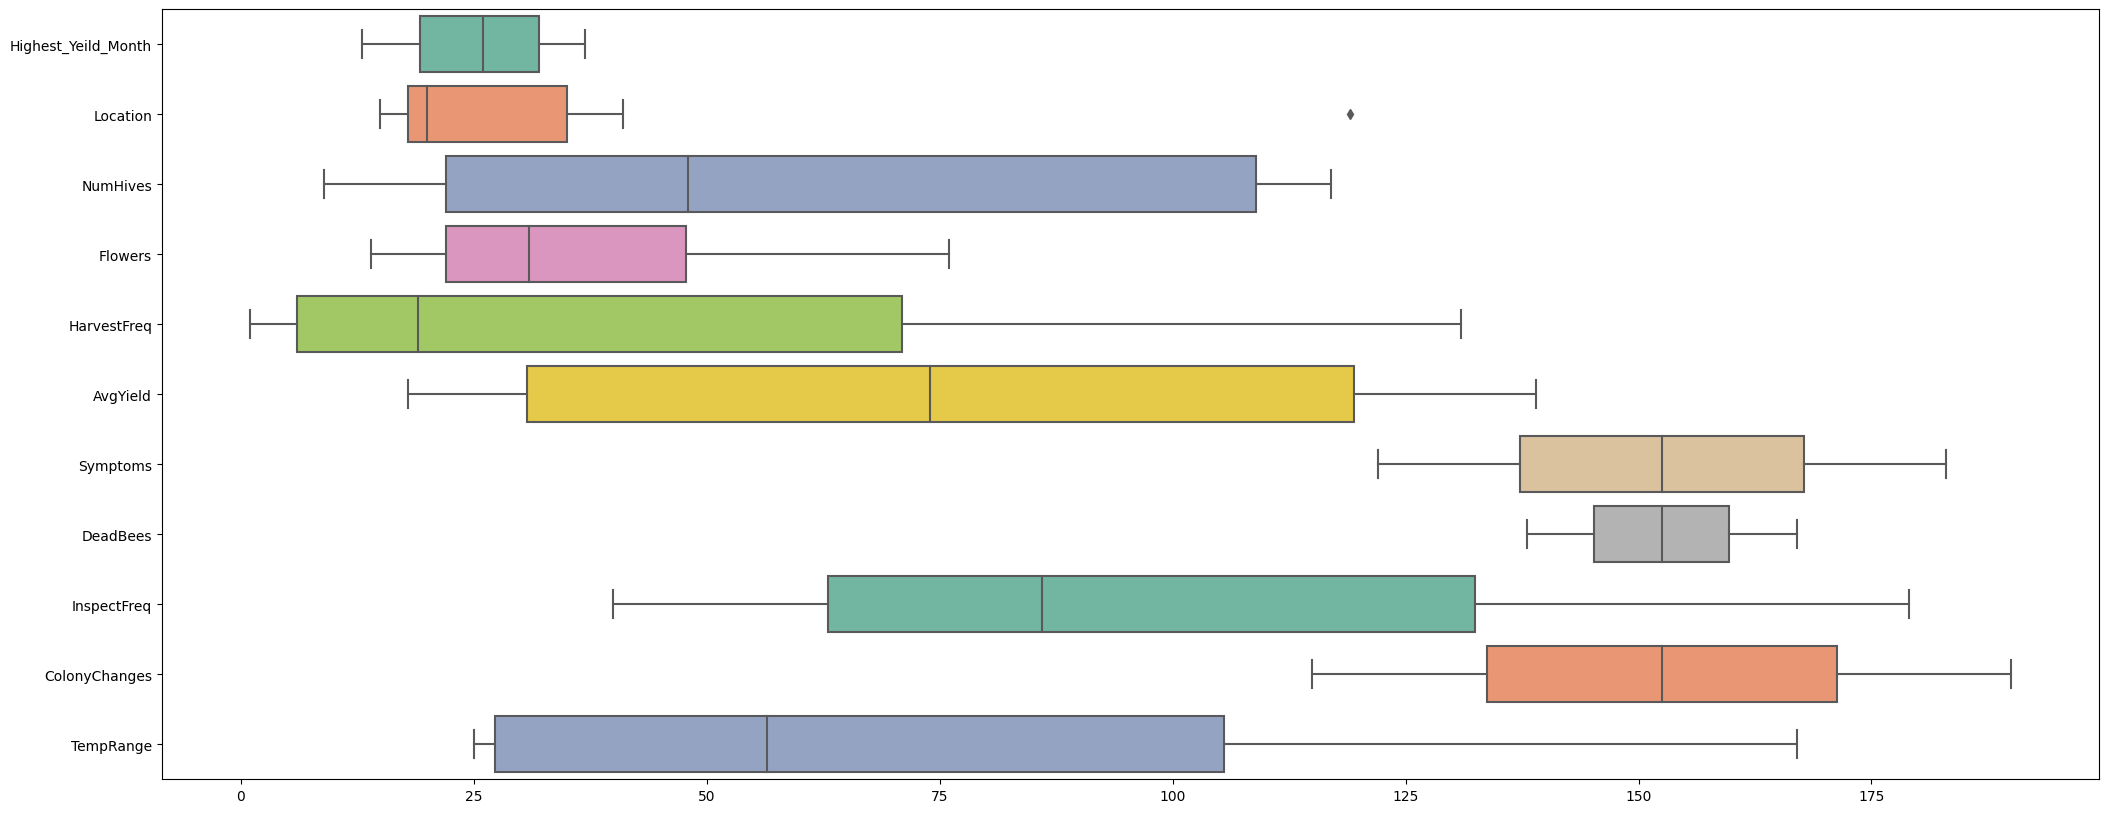

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(data=value_counts_df, orient="h", palette="Set2",ax=ax );

Here we can't identify outliers as it shows only a value count. This is just for reference. (We can check the outliers only from numerical columns)


###  **Histograms of the features** 

A histogram is a graphical representation of the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable. To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not necessarily) of the same size.

A histogram consists of tabular frequencies, shown as adjacent rectangles, erected over discrete intervals (bins), with an area equal to the frequency of the observations in the interval. The height of a rectangle is also equal to the frequency density of the interval, i.e., the frequency divided by the width of the interval. The total area of the histogram is equal to the number of data.

<Axes: >

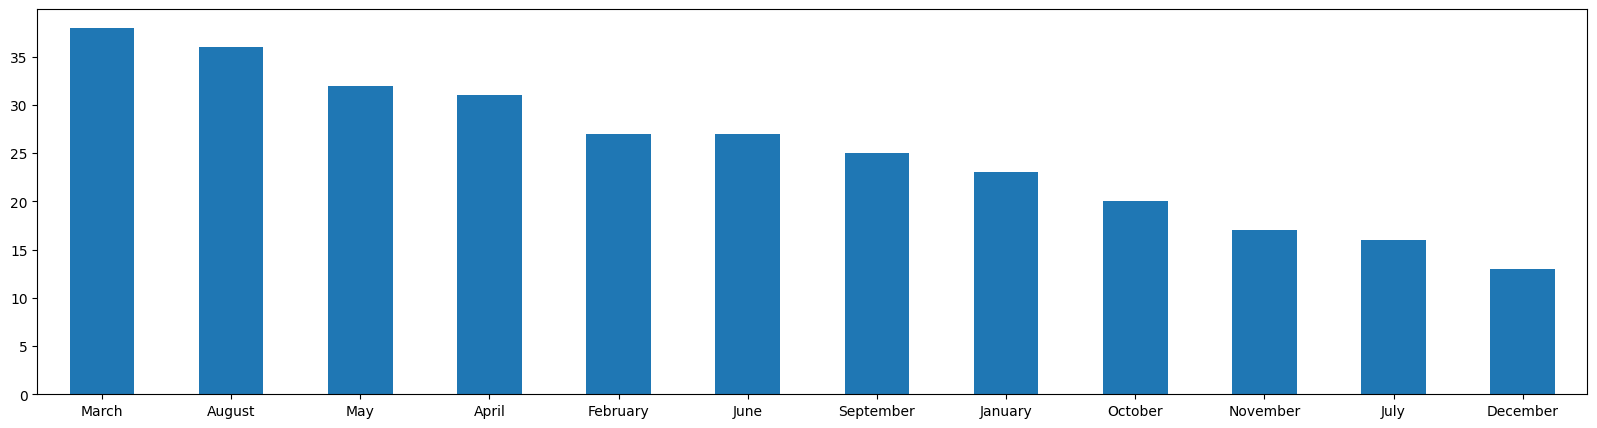

In [7]:
fig = plt.figure(figsize = (20,5))
beeDataframe['Highest_Yeild_Month'].value_counts().plot.bar(rot=0)

<Axes: >

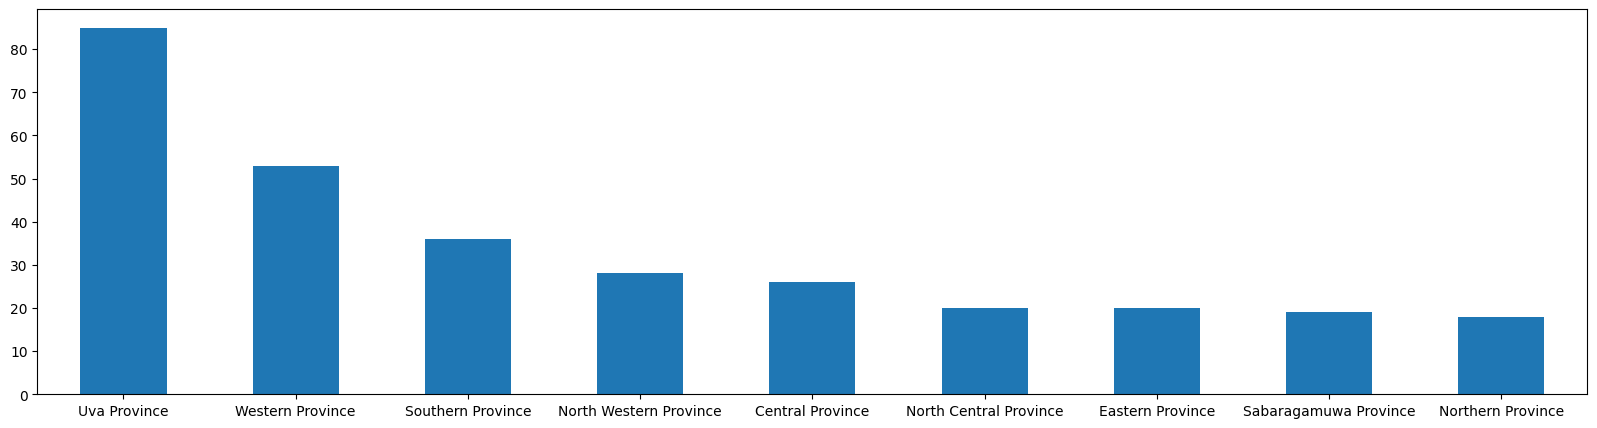

In [8]:
fig = plt.figure(figsize = (20,5))
beeDataframe['Location'].value_counts().plot.bar(rot=0)

In [11]:
value_counts = beeDataframe['Location'].value_counts()
total = len(beeDataframe)

for location, count in value_counts.items():
    percentage = (count / total) * 100
    print(f"{location} - {percentage:.2f}%")

Uva Province - 27.87%
Western Province - 17.38%
Southern Province - 11.80%
North Western Province - 9.18%
Central Province - 8.52%
North Central Province - 6.56%
Eastern Province - 6.56%
Sabaragamuwa Province - 6.23%
Northern Province - 5.90%


<Axes: >

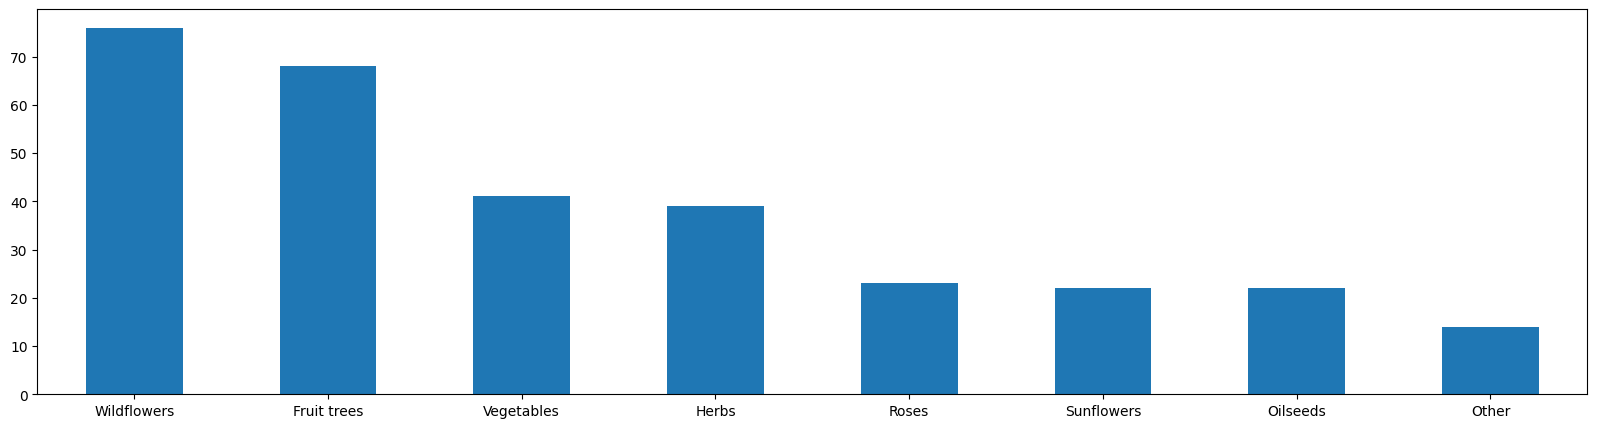

In [9]:
fig = plt.figure(figsize = (20,5))
beeDataframe['Flowers'].value_counts().plot.bar(rot=0)

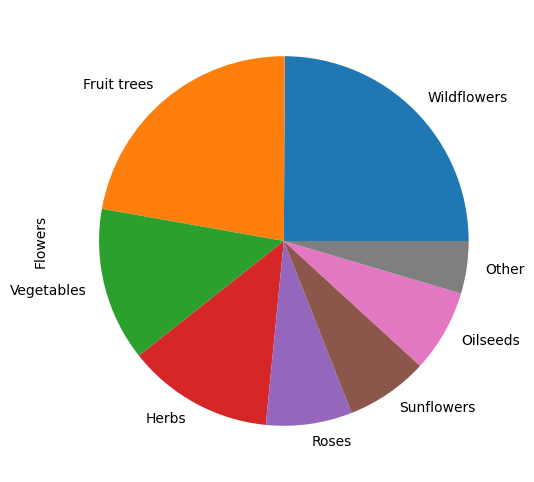

In [10]:
# Also we can show this in pie chart
beeDataframe['Flowers'].value_counts().plot(kind='pie', figsize=(6,6));

##  **Data encoding** 

Data encoding is the process of converting data from one format or type into another format or type. The primary reason for data encoding is to prepare data for analysis or to make it compatible with the algorithm. 

In [ ]:
beeDataframe.head(2)

,Highest_Yeild_Month,Location,NumHives,Flowers,HarvestFreq,AvgYield,Symptoms,DeadBees,InspectFreq,ColonyChanges,TempRange
0,February,Uva Province,51-100,Vegetables,Once a Year,21-60,No,No,Every 2 Weeks,Yes,32-100
1,May,North Central Province,101-500,Sunflowers,Twice a Year,21-60,Yes,Yes,Every 2 Weeks,Yes,32-100


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


encoders = {}
for col in beeDataframe.columns:
    if beeDataframe[col].dtype == 'object': 
        encoders[col] = LabelEncoder()
        beeDataframe[col] = encoders[col].fit_transform(beeDataframe[col])


In [ ]:
beeDataframe.head()

,Highest_Yeild_Month,Location,NumHives,Flowers,HarvestFreq,AvgYield,Symptoms,DeadBees,InspectFreq,ColonyChanges,TempRange
0,1,7,4,6,4,2,0,0,0,1,3
1,4,2,1,5,6,2,1,1,0,1,3
2,3,8,1,5,6,3,0,0,0,0,1
3,1,7,1,0,4,2,1,1,0,1,2
4,4,7,1,0,4,2,1,1,0,1,2


In [ ]:
# If we want to decode this

In [ ]:
decoded_values = encoders['AvgYield'].inverse_transform([2])
print(decoded_values)

['21-60']


# **Training Models** 

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate the features and target variable
X = beeDataframe.drop('AvgYield', axis=1)
y = beeDataframe['AvgYield']

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.1,random_state=50)

Here I do a test train split. 

Train test split is a model validation process that allows you to simulate how your model would perform with new data. 



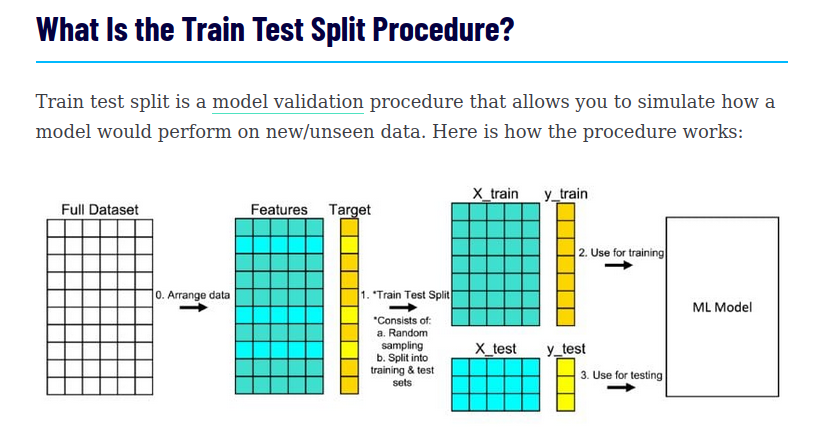

Here train_x and train_y used to to train our model. As unseen data we use test_x and the test_y will be the actual output. We predict the wind speed using this unseen test_x values. It will return the predicted wind speed. Then we can compare it with our test_y data.


In [ ]:
test_x #This is our input data for the prediction

,Highest_Yeild_Month,Location,NumHives,Flowers,HarvestFreq,Symptoms,DeadBees,InspectFreq,ColonyChanges,TempRange
263,3,4,3,2,4,0,1,2,1,1
468,6,7,1,0,0,1,0,1,1,3
201,0,3,0,7,4,1,0,1,1,0
213,3,5,0,1,4,1,0,0,0,0
65,3,7,0,3,4,0,1,1,1,3
191,6,6,0,7,4,1,1,0,1,3
491,0,3,1,6,0,0,0,1,0,1
126,3,1,4,0,6,1,0,1,1,3
445,2,1,0,4,3,0,1,0,0,1
23,6,6,1,0,6,0,1,0,1,3


In [ ]:
test_y #this is our actual output data (AvgYield) for the previous test data

263    2
468    3
201    0
213    0
65     0
191    0
491    3
126    2
445    1
23     1
98     2
170    2
364    1
208    2
145    3
443    1
332    1
543    3
490    3
536    3
67     2
420    1
441    1
290    0
323    0
379    1
430    1
259    3
437    1
37     0
505    3
455    3
547    3
352    1
384    1
497    3
494    3
236    2
448    1
522    3
474    3
247    1
526    3
97     2
222    0
204    0
345    1
517    3
179    0
471    3
42     3
216    0
244    3
162    2
166    2
386    1
Name: AvgYield, dtype: int64

## Model 1 - DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Define the grid of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
}

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_x, train_y)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data
best_decision_tree_model = grid_search.best_estimator_
y_pred = best_decision_tree_model.predict(test_x)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8}


In [ ]:
# let's see the model predicted 
y_pred

array([1, 3, 0, 0, 0, 0, 3, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       3, 0, 3, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 3, 1, 0, 1, 3, 3, 3, 3, 2,
       0, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2, 1])

**Accuracy Mesurements**

In [ ]:
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7142857142857143


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(test_y,y_pred)
print(cf_matrix)
print(classification_report(test_y,y_pred))

[[ 8  0  2  1]
 [ 0 13  1  2]
 [ 2  2  6  0]
 [ 0  4  2 13]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.68      0.81      0.74        16
           2       0.55      0.60      0.57        10
           3       0.81      0.68      0.74        19

    accuracy                           0.71        56
   macro avg       0.71      0.71      0.70        56
weighted avg       0.73      0.71      0.72        56



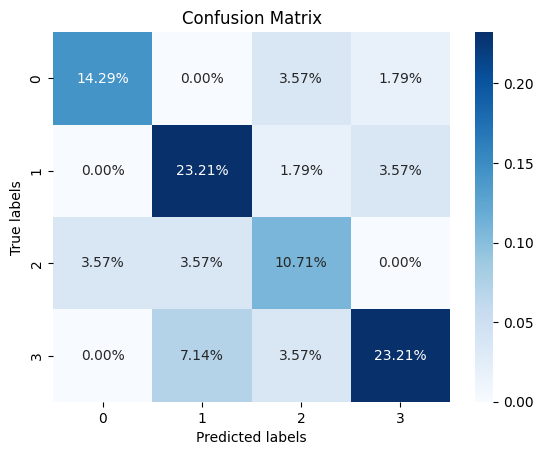

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', ax=ax);  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Model 2 - RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest classifier object
clf = RandomForestClassifier()

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [10,20,30,40,50,60],
    'max_depth': [2, 5, 10, 15],
}

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_x, train_y)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data
best_random_forest_model = grid_search.best_estimator_
y_pred = best_random_forest_model.predict(test_x)

Best hyperparameters:  {'max_depth': 10, 'n_estimators': 20}


In [ ]:
y_pred

array([1, 3, 0, 0, 3, 0, 3, 2, 1, 2, 0, 2, 1, 0, 3, 1, 1, 3, 3, 3, 2, 1,
       1, 0, 0, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 3, 3, 0, 1, 3, 3, 1, 3, 2,
       0, 0, 1, 3, 0, 3, 3, 2, 2, 0, 2, 1])

**Accuracy Mesurements**

In [ ]:
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8392857142857143


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(test_y,y_pred)
print(cf_matrix)
print(classification_report(test_y,y_pred))

[[ 9  0  1  1]
 [ 0 15  1  0]
 [ 4  1  5  0]
 [ 0  0  1 18]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.94      0.94      0.94        16
           2       0.62      0.50      0.56        10
           3       0.95      0.95      0.95        19

    accuracy                           0.84        56
   macro avg       0.80      0.80      0.80        56
weighted avg       0.84      0.84      0.84        56



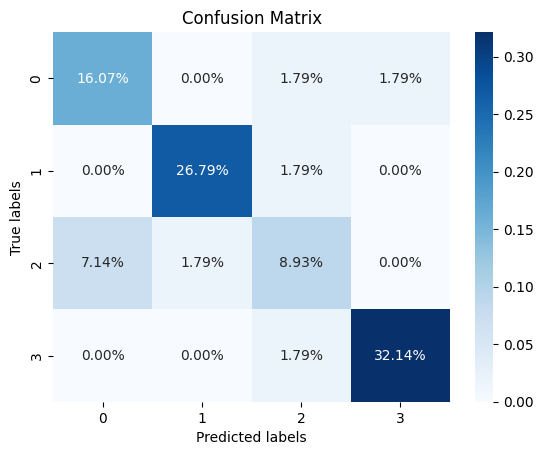

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', ax=ax);  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Model 3 - XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model with default parameters
xgbc = XGBClassifier(objective='multi:softmax', num_class=4, max_depth=10, eta=0.1)

# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9,11],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Define the GridSearchCV object with the XGBoost model and hyperparameter grid
grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_x, train_y)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(test_x)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters:  {'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 11}


In [ ]:
y_pred

array([1, 3, 0, 0, 0, 0, 3, 2, 1, 2, 0, 2, 1, 2, 3, 1, 1, 3, 0, 3, 2, 1,
       3, 2, 0, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 3, 3, 0, 1, 3, 3, 1, 3, 2,
       0, 0, 1, 3, 0, 3, 2, 0, 2, 0, 2, 1], dtype=int32)

**Accuracy Mesurements**

In [ ]:
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8214285714285714


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(test_y,y_pred)
print(cf_matrix)
print(classification_report(test_y,y_pred))

[[10  0  1  0]
 [ 0 14  1  1]
 [ 3  1  6  0]
 [ 1  0  2 16]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.93      0.88      0.90        16
           2       0.60      0.60      0.60        10
           3       0.94      0.84      0.89        19

    accuracy                           0.82        56
   macro avg       0.80      0.81      0.80        56
weighted avg       0.83      0.82      0.82        56



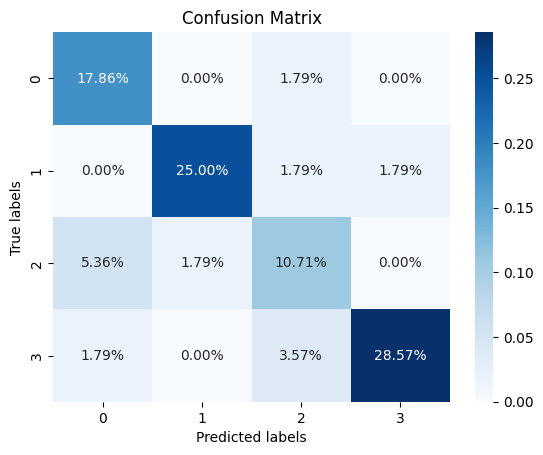

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', ax=ax);  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Conclusion- Random_forest_model Performs well with 84% Accuracy

In [ ]:
# Now we can export this model as a pickle file
import pickle
pickle.dump(best_random_forest_model, open('model.pkl', 'wb'))

In [ ]:
# Need to save the encoder as well
pickle.dump(encoders, open('label_encoder.pkl', 'wb'))